<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1: O time de Cartão de Crédito necessita de visibilidade sobre a performance do motor de aprovação do produto. 
<br>A Tabela CreditStatus possui o status atual dos clientes que fizeram o pedido do cartão de crédito. Considere os seguintes possíveis status: Reprovado (teve pedido do cartão de crédito recusado), Aprovado (teve pedido do cartão de crédito aprovado), Ativo (teve pedido do cartão de crédito aprovado e contratou o produto) e Bloqueado (contratou o cartão de crédito e está inadimplente).

---
---

In [77]:
#importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importação da biblioteca que 'limpa' avisos desnecessários
import warnings
warnings.simplefilter('ignore')

In [78]:
#criação dos 3 datasets: client, credit e invoice
client = pd.read_excel('/content/drive/MyDrive/case_business_analytics_v5.xlsx', sheet_name='Tabela_Client')
credit_status = pd.read_excel('/content/drive/MyDrive/case_business_analytics_v5.xlsx', sheet_name='Tabela_CreditStatus')
invoice_status = pd.read_excel('/content/drive/MyDrive/case_business_analytics_v5.xlsx', sheet_name='Tabela_InvoiceStatus')

In [79]:
#primriras linhas do dataset client
client.head(3)

,ClientId,Gender,Platform,OSVersion,AddressState,Birthdate,CurrentStatus,RegisterDate,RegisterConclusionDate,RegisterApprovalDate,FirstTransactionDate,PresumedIncome
0,81.0,Male,iPhone+OS,9.3.2,SP,1991-04-24,Aprovado,2016-05-31,NaT,2016-06-06,2016-06-14,4161.75
1,159.0,Female,iPhone+OS,9.3.2,SP,1991-04-09,Aprovado,2016-07-05,NaT,2016-08-24,2016-11-18,4225.12
2,316.0,Male,Android,9.3.2,SP,1991-08-04,Aprovado,2016-07-15,NaT,2016-09-08,2019-08-29,14233.47


In [80]:
#primeiras linhas do dataset credit
credit_status.head(3)

,ClientId,CreditStatus
0,698350,Ativo
1,817285,Ativo
2,962167,Ativo


In [81]:
#primeiras linhas do dataset invoice
invoice_status.head(3)

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue
0,2020-01-05,5503,2019-05-05,459297,2020-01-05,0,REGULAR,451.60
1,2019-10-05,11313,2019-07-05,1209407,2019-10-05,0,REGULAR,2.09
2,2019-09-25,26648,2019-04-25,1142564,2019-09-25,0,REGULAR,123.03


**Verificando valores nulos nos 3 datasets**

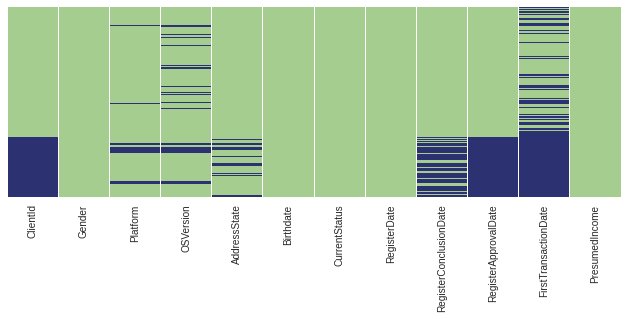

In [82]:
#setando o tamanho do gráfico
plt.figure(figsize=(11, 3.5))

#plotando o heatmap para mapear valores nulos
sns.heatmap(client.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [83]:
#contagem de valores nulos e ordenação
client.isna().sum().sort_values(ascending=False)

FirstTransactionDate      30310
ClientId                  18089
RegisterApprovalDate      18089
RegisterConclusionDate    13948
OSVersion                  6781
AddressState               3779
Platform                   3511
Birthdate                    30
Gender                        0
CurrentStatus                 0
RegisterDate                  0
PresumedIncome                0
dtype: int64

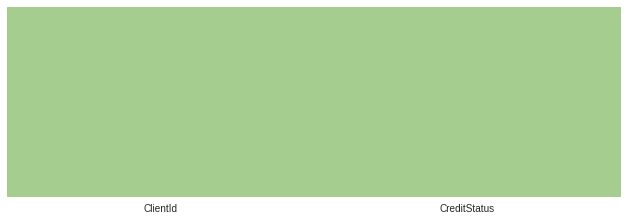

In [84]:
#setando o tamanho do gráfico
plt.figure(figsize=(11, 3.5))

#plotando o heatmap para mapear valores nulos
sns.heatmap(credit_status.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [85]:
#contagem de valores nulos e ordenação
credit_status.isna().sum().sort_values(ascending=False)

ClientId        0
CreditStatus    0
dtype: int64

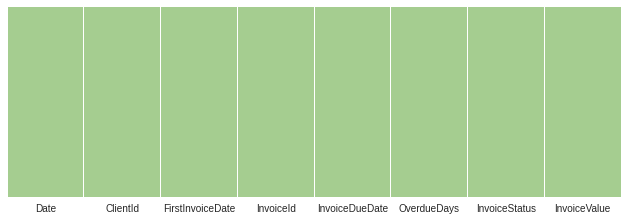

In [86]:
#setando o tamanho do gráfico
plt.figure(figsize=(11, 3.5))

#plotando o heatmap para mapear valores nulos
sns.heatmap(invoice_status.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [87]:
#contagem de valores nulos e ordenação
invoice_status.isna().sum().sort_values(ascending=False)

Date                0
ClientId            0
FirstInvoiceDate    0
InvoiceId           0
InvoiceDueDate      0
OverdueDays         0
InvoiceStatus       0
InvoiceValue        0
dtype: int64

*   **1.1: Qual a taxa de aprovação dos clientes? (i.e., qual o percentual de clientes aprovados)**	
*   **1.2: Quais características dos clientes apresentam maior correlação com a resposta de aprovação do motor de crédito?** 

In [88]:
#mostrar os valores distintos pra poder classificar mais um de uma categoria em "Aprovado"
print(credit_status['CreditStatus'].unique())

['Ativo' 'Reprovado' 'Bloqueado' 'Aprovado']


In [89]:
#contagem de clientes em cada categoria 'CreditStatus'
credit_status.groupby('CreditStatus')['ClientId'].count()

CreditStatus
Aprovado       203
Ativo        16749
Bloqueado     2189
Reprovado    15622
Name: ClientId, dtype: int64

In [90]:
# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
conditions = [
    (credit_status['CreditStatus'] == 'Ativo'),
    (credit_status['CreditStatus'] == 'Reprovado'),
    (credit_status['CreditStatus'] == 'Bloqueado'),
    (credit_status['CreditStatus'] == 'Aprovado')]

#valores ordenados que serão substítuidos
values = ['Aprovado', 'Reprovado', 'Bloqueado', 'Aprovado']

In [91]:
#aplicar a função pra susbtituir "Ativo" em "Aprovado"
credit_status['Aprovacao'] = np.select(conditions, values)

#contagem de clientes em cada nova categoria "CreditStatus"
approve = credit_status.groupby('Aprovacao')['ClientId'].count()

#exibir o resultado
print(approve)

Aprovacao
Aprovado     16952
Bloqueado     2189
Reprovado    15622
Name: ClientId, dtype: int64


In [92]:
#cálculo da taxa de aprovação na visão geral
taxa_aprovacao = approve[0] / approve.sum()
print((np.round(taxa_aprovacao, 3) * 100), "%")

48.8 %


**1.1: Taxa de aprovação dos clientes = 48,8%**


---
---

In [93]:
#unindo os datasets credit e client
motor_corr = pd.merge(credit_status, client, how='left', on='ClientId')

#selecionando apenas as variáveis mais relevantes para fazer correlação
motor_corr_clean = motor_corr[['CreditStatus', 'Aprovacao', 'Gender', 'Platform', 'OSVersion', 'AddressState', 'Birthdate', 'CurrentStatus', 'PresumedIncome', 'RegisterApprovalDate']]

#visualizando as primeiras linhas
motor_corr_clean.head(3)

#construindo a variável idade
motor_corr_clean['idade'] = motor_corr_clean.RegisterApprovalDate - motor_corr_clean.Birthdate

#convertendo a variável idade para númerico
motor_corr_clean['idade'] = (motor_corr_clean['idade'].dt.days / 365)

#mostrando as primeiras linhas
motor_corr_clean.head(3)

,CreditStatus,Aprovacao,Gender,Platform,OSVersion,AddressState,Birthdate,CurrentStatus,PresumedIncome,RegisterApprovalDate,idade
0,Ativo,Aprovado,Male,Android,7.0,PR,1990-10-23,Aprovado,1391.24,2018-10-16,28.000000
1,Ativo,Aprovado,Female,Android,NaN,SC,1990-08-22,Aprovado,1227.42,2018-11-10,28.238356
2,Ativo,Aprovado,Male,Android,8.0.0,SP,1984-01-09,Aprovado,4076.58,2018-12-16,34.958904


In [94]:
# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
fx_idade_1 = motor_corr_clean.loc[(motor_corr_clean['idade'] <= 18)]
fx_idade_1['fx_idade'] = '0-18'

fx_idade_2 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 18) & (motor_corr_clean['idade'] <= 26)]
fx_idade_2['fx_idade'] = '19-26'

fx_idade_3 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 26) & (motor_corr_clean['idade'] <= 34)]
fx_idade_3['fx_idade'] = '27-34'

fx_idade_4 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 34) & (motor_corr_clean['idade'] <= 42)]
fx_idade_4['fx_idade'] = '35-42'

fx_idade_5 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 42) & (motor_corr_clean['idade'] <= 50)]
fx_idade_5['fx_idade'] = '43-50'

fx_idade_6 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 50) & (motor_corr_clean['idade'] <= 58)]
fx_idade_6['fx_idade'] = '51-58'

fx_idade_7 = motor_corr_clean.loc[(motor_corr_clean['idade'] > 58)]
fx_idade_7['fx_idade'] = 'maior que 58'

novo_df = pd.concat([fx_idade_1, fx_idade_2, fx_idade_3, fx_idade_4, fx_idade_5, fx_idade_6, fx_idade_7])

#plt.figure(figsize=(13, 6))
#novo_df.groupby('fx_idade')['PresumedIncome'].mean().plot(kind='bar')

In [95]:
# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
conditions_1 = [
    (novo_df['CreditStatus'] == 'Ativo'),
    (novo_df['CreditStatus'] == 'Reprovado'),
    (novo_df['CreditStatus'] == 'Bloqueado'),
    (novo_df['CreditStatus'] == 'Aprovado')]

#valores ordenados que serão substítuidos
#values = [1, 2, 3, 4]
values_v2 = [1, 0, 0, 1]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
#novo_df['CreditStatus_flg'] = np.select(conditions_1, values)
novo_df['CreditStatus_flg'] = np.select(conditions_1, values_v2)

In [96]:
# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
conditions_2 = [
    (novo_df['fx_idade'] == '0-18'),
    (novo_df['fx_idade'] == '19-26'),
    (novo_df['fx_idade'] == '27-34'),
    (novo_df['fx_idade'] == '35-42'),
    (novo_df['fx_idade'] == '43-50'),
    (novo_df['fx_idade'] == '51-58'),
    (novo_df['fx_idade'] == 'maior que 58')]

#valores ordenados que serão substítuidos
values = [1, 2, 3, 4, 5, 6, 7]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
novo_df['fx_idade_flg'] = np.select(conditions_2, values)

novo_df[['fx_idade_flg', 'CreditStatus_flg']].corr()

,fx_idade_flg,CreditStatus_flg
fx_idade_flg,1.00000,0.10794
CreditStatus_flg,0.10794,1.00000


In [97]:
novo_df['Gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [98]:
conditions_3 = [
    (novo_df['Gender'] == 'Male'),
    (novo_df['Gender'] == 'Female'),
    (novo_df['Gender'] == 'Unknown')]

#valores ordenados que serão substítuidos
values = [1, 2, 3]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
novo_df['Gender_flg'] = np.select(conditions_3, values)

novo_df[['Gender_flg', 'CreditStatus_flg']].corr()

,Gender_flg,CreditStatus_flg
Gender_flg,1.000000,-0.030154
CreditStatus_flg,-0.030154,1.000000


In [99]:
novo_df['Platform'].unique()

array(['iPhone+OS', 'Android', nan], dtype=object)

In [100]:
conditions_4 = [
    (novo_df['Platform'] == 'iPhone+OS'),
    (novo_df['Platform'] == 'Android'),
    (novo_df['Platform'] == '')]

#valores ordenados que serão substítuidos
values = [1, 2, 3]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
novo_df['Platform_flg'] = np.select(conditions_4, values)

novo_df[['Platform_flg', 'CreditStatus_flg']].corr()

,Platform_flg,CreditStatus_flg
Platform_flg,1.000000,-0.052547
CreditStatus_flg,-0.052547,1.000000


In [101]:
novo_df['OSVersion'].unique()

array(['10.3.3', '7.0', '11.3.1', '6.0.1', '12.2', '11.4', 9, nan,
       '7.1.1', '8.1.0', '8.0.0', '12.1', '13.1.3', '12.4', '5.1.1',
       '13.1.2', '12.4.1', '11.1.2', '12.4.2', '6.0', '12.1.4', '10.2.1',
       '5.0.2', '13.3', '7.1.2', '13.0', '10.0', '12.3.1', '5.1',
       '12.1.2', '12.4.3', '11.4.1', '11.2.6', '4.4.2', '11.0', '10.1.1',
       '13.2.3', '11.0.3', '12.1.1', '9.3.5', '10.3.1', '12.3.2', '5.0.1',
       '1.0.7.2', '13.2', '4.4.4', '5.0', '11.2.5', '12.0.1', '12.0',
       '4.2.2', '11.3', '10.3.2', '10.0.2', '11.2.1', '12.3', '9.3.2',
       '4.3', '12.1.3', '11.1', '4.1.2', '12.4.4', '9.3.6', '10.3.4',
       '10.2', '11.1.1', '1.0.8.2', '13.2.2', '11.0.1', '11.2.2', '10.1',
       '1.0.8.1', '11.0.2', '13.1.1', '10.0.1', '13.1', '9.2.1', '9.3.4',
       '4.4.3', '1.0.8', '11.2', '9.3', '9.0', '9.3.3', '10.3', '9.2',
       '9.3.1', '7.1', 10, '8.1.0+++xXx_NoLimits_3.3', '6.1', '8.1',
       '8.0'], dtype=object)

In [102]:
conditions_6 = [
    (novo_df['OSVersion'] == '10.3.3'),
    (novo_df['OSVersion'] == '7.0'),
    (novo_df['OSVersion'] == '11.3.1'),
    (novo_df['OSVersion'] == '6.0.1'),
    (novo_df['OSVersion'] == '12.2'),
    (novo_df['OSVersion'] == '11.4'),
    (novo_df['OSVersion'] == ''),
    (novo_df['OSVersion'] == '7.1.1'),
    (novo_df['OSVersion'] == '8.1.0'),
    (novo_df['OSVersion'] == '8.0.0'),
    (novo_df['OSVersion'] == '12.1'),
    (novo_df['OSVersion'] == '13.1.3'),
    (novo_df['OSVersion'] == '12.4'),
    (novo_df['OSVersion'] == '5.1.1'),
    (novo_df['OSVersion'] == '13.1.2'),
    (novo_df['OSVersion'] == '12.4.1'),
    (novo_df['OSVersion'] == '11.1.2'),
    (novo_df['OSVersion'] == '12.4.2'),
    (novo_df['OSVersion'] == '6.0'),
    (novo_df['OSVersion'] == '12.1.4'),
    (novo_df['OSVersion'] == '10.2.1'),
    (novo_df['OSVersion'] == '5.0.2'),
    (novo_df['OSVersion'] == '13.3'),
    (novo_df['OSVersion'] == '7.1.2'),
    (novo_df['OSVersion'] == '13.0'),
    (novo_df['OSVersion'] == '10.0'),
    (novo_df['OSVersion'] == '12.3.1'),
    (novo_df['OSVersion'] == '5.1'),
    (novo_df['OSVersion'] == '12.1.2'),
    (novo_df['OSVersion'] == '12.4.3'),
    (novo_df['OSVersion'] == '11.4.1'),
    (novo_df['OSVersion'] == '11.2.6'),
    (novo_df['OSVersion'] == '4.4.2'),
    (novo_df['OSVersion'] == '11.0'),
    (novo_df['OSVersion'] == '10.1.1'),
    (novo_df['OSVersion'] == '13.2.3'),
    (novo_df['OSVersion'] == '11.0.3'),
    (novo_df['OSVersion'] == '12.1.1'),
    (novo_df['OSVersion'] == '9.3.5'),
    (novo_df['OSVersion'] == '10.3.1'),
    (novo_df['OSVersion'] == '12.3.2'),
    (novo_df['OSVersion'] == '5.0.1'),
    (novo_df['OSVersion'] == '1.0.7.2'),
    (novo_df['OSVersion'] == '13.2'),
    (novo_df['OSVersion'] == '4.4.4'),
    (novo_df['OSVersion'] == '5.0'),
    (novo_df['OSVersion'] == '11.2.5'),
    (novo_df['OSVersion'] == '12.0.1'),
    (novo_df['OSVersion'] == '12.0'),
    (novo_df['OSVersion'] == '4.2.2'),
    (novo_df['OSVersion'] == '11.3'),
    (novo_df['OSVersion'] == '10.3.2'),
    (novo_df['OSVersion'] == '10.0.2'),
    (novo_df['OSVersion'] == '11.2.1'),
    (novo_df['OSVersion'] == '12.3'),
    (novo_df['OSVersion'] == '9.3.2'),
    (novo_df['OSVersion'] == '4.3'),
    (novo_df['OSVersion'] == '12.1.3'),
    (novo_df['OSVersion'] == '11.1'),
    (novo_df['OSVersion'] == '4.1.2'),
    (novo_df['OSVersion'] == '12.4.4'),
    (novo_df['OSVersion'] == '9.3.6'),
    (novo_df['OSVersion'] == '10.3.4'),
    (novo_df['OSVersion'] == '10.2'),
    (novo_df['OSVersion'] == '11.1.1'),
    (novo_df['OSVersion'] == '1.0.8.2'),
    (novo_df['OSVersion'] == '13.2.2'),
    (novo_df['OSVersion'] == '11.0.1'),
    (novo_df['OSVersion'] == '11.2.2'),
    (novo_df['OSVersion'] == '10.1'),
    (novo_df['OSVersion'] == '1.0.8.1'),
    (novo_df['OSVersion'] == '11.0.2'),
    (novo_df['OSVersion'] == '13.1.1'),
    (novo_df['OSVersion'] == '10.0.1'),
    (novo_df['OSVersion'] == '13.1'),
    (novo_df['OSVersion'] == '9.2.1'),
    (novo_df['OSVersion'] == '9.3.4'),
    (novo_df['OSVersion'] == '4.4.3'),
    (novo_df['OSVersion'] == '1.0.8'),
    (novo_df['OSVersion'] == '11.2'),
    (novo_df['OSVersion'] == '9.3'),
    (novo_df['OSVersion'] == '9.0'),
    (novo_df['OSVersion'] == '9.3.3'),
    (novo_df['OSVersion'] == '10.3'),
    (novo_df['OSVersion'] == '9.2'),
    (novo_df['OSVersion'] == '9.3.1'),
    (novo_df['OSVersion'] == '7.1'),
    (novo_df['OSVersion'] == '10'),
    (novo_df['OSVersion'] == '8.1.0+++xXx_NoLimits_3.3'),
    (novo_df['OSVersion'] == '6.1'),
    (novo_df['OSVersion'] == '8.1'),
    (novo_df['OSVersion'] == '8.0')]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]

novo_df['OSVersion_flg'] = np.select(conditions_6, values)


,OSVersion_flg,CreditStatus_flg
OSVersion_flg,1.000000,0.020497
CreditStatus_flg,0.020497,1.000000


**Correlação entre as variáveis de clientes e a resposta do motor**

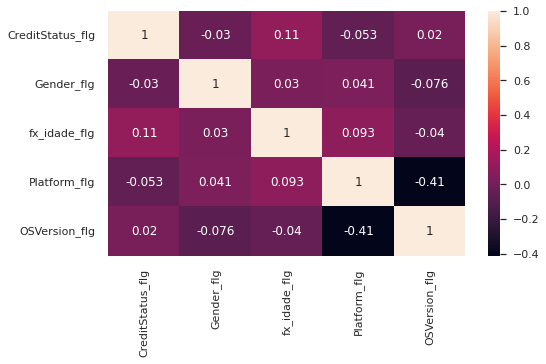

In [172]:
plt.figure(figsize=(8, 4.5))
sns.heatmap(novo_df[['CreditStatus_flg', 'Gender_flg', 'fx_idade_flg', 'Platform_flg', 'OSVersion_flg']].corr(), annot=True)

In [103]:
#criando uma cópia do dataset invoice
inad_geral = invoice_status.copy()

#excluindo faturas nulas que não compõem o indicador
inad_geral_v1 = inad_geral.loc[(inad_geral['InvoiceValue'] != 0)]

#aplicando a marcação de over30
inad_geral_v1['Over'] = np.where(inad_geral_v1['OverdueDays'] >= 30, 'Sim', 'Não')

inad_geral_v1 = inad_geral_v1.groupby('Over')['ClientId'].count()
over_30_geral = inad_geral_v1[1] / inad_geral_v1.sum()

print((np.round(over_30_geral, 3) * 100), "%")
print('\n')
print(inad_geral_v1)

10.9 %


Over
Não    93931
Sim    11494
Name: ClientId, dtype: int64


**2.1: Over 30 mob3 - visão geral = 10,9%**


---
---

**Over 30 - Safra Janeiro/19**

In [104]:
jan = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-01-01') & (invoice_status['FirstInvoiceDate'] <= '2019-01-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-04-01') & (invoice_status['InvoiceDueDate'] <= '2019-04-30') & (invoice_status['InvoiceValue'] != 0)]

inad_jan = pd.DataFrame()
inad_jan['Over'] = np.where(jan['OverdueDays'] >= 30, 'Sim', 'Não')

inad_jan = inad_jan.groupby('Over')['Over'].count()
over_30_jan = inad_jan[1] / inad_jan.sum()

print((np.round(over_30_jan, 3) * 100), "%")
print('\n')
inad_jan

10.7 %




Over
Não    646
Sim     77
Name: Over, dtype: int64

**Over 30 - Safra Fevereiro/19**

In [105]:
fev = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-02-01') & (invoice_status['FirstInvoiceDate'] <= '2019-02-28') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-05-01') & (invoice_status['InvoiceDueDate'] <= '2019-05-31') & (invoice_status['InvoiceValue'] != 0)]

inad_fev = pd.DataFrame()
inad_fev['Over'] = np.where(fev['OverdueDays'] >= 30, 'Sim', 'Não')

inad_fev = inad_fev.groupby('Over')['Over'].count()
over_30_fev = inad_fev[1] / inad_fev.sum()

print((np.round(over_30_fev, 3) * 100), "%")
print('\n')
inad_fev

11.0 %




Over
Não    835
Sim    103
Name: Over, dtype: int64

**Over 30 - Safra Março/19**

In [106]:
mar = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-03-01') & (invoice_status['FirstInvoiceDate'] <= '2019-03-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-06-01') & (invoice_status['InvoiceDueDate'] <= '2019-06-30') & (invoice_status['InvoiceValue'] != 0)]

inad_mar = pd.DataFrame()
inad_mar['Over'] = np.where(mar['OverdueDays'] >= 30, 'Sim', 'Não')

inad_mar = inad_mar.groupby('Over')['Over'].count()
over_30_mar = inad_mar[1] / inad_mar.sum()

print((np.round(over_30_mar, 3) * 100), "%")
print('\n')
inad_mar

10.100000000000001 %




Over
Não    773
Sim     87
Name: Over, dtype: int64

**Over 30 - Safra Abril/19**

In [107]:
abr = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-04-01') & (invoice_status['FirstInvoiceDate'] <= '2019-04-30') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-07-01') & (invoice_status['InvoiceDueDate'] <= '2019-07-31') & (invoice_status['InvoiceValue'] != 0)]

inad_abr = pd.DataFrame()
inad_abr['Over'] = np.where(abr['OverdueDays'] >= 30, 'Sim', 'Não')

inad_abr = inad_abr.groupby('Over')['Over'].count()
over_30_abr = inad_abr[1] / inad_abr.sum()

print((np.round(over_30_abr, 3) * 100), "%")
print('\n')
inad_abr

11.200000000000001 %




Over
Não    1035
Sim     130
Name: Over, dtype: int64

**Over 30 - Safra Maio/19**

In [108]:
mai = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-05-01') & (invoice_status['FirstInvoiceDate'] <= '2019-05-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-08-01') & (invoice_status['InvoiceDueDate'] <= '2019-08-31') & (invoice_status['InvoiceValue'] != 0)]

inad_mai = pd.DataFrame()
inad_mai['Over'] = np.where(mai['OverdueDays'] >= 30, 'Sim', 'Não')

inad_mai = inad_mai.groupby('Over')['Over'].count()
over_30_mai = inad_mai[1] / inad_mai.sum()

print((np.round(over_30_mai, 3) * 100), "%")
print('\n')
inad_mai

25.1 %




Over
Não    1515
Sim     507
Name: Over, dtype: int64

**Over 30 - Safra Junho/19**

In [109]:
jun = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-06-01') & (invoice_status['FirstInvoiceDate'] <= '2019-06-30') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-09-01') & (invoice_status['InvoiceDueDate'] <= '2019-09-30') & (invoice_status['InvoiceValue'] != 0)]

inad_jun = pd.DataFrame()
inad_jun['Over'] = np.where(jun['OverdueDays'] >= 30, 'Sim', 'Não')

inad_jun = inad_jun.groupby('Over')['Over'].count()
over_30_jun = inad_jun[1] / inad_jun.sum()

print((np.round(over_30_jun, 3) * 100), "%")
print('\n')
inad_jun

24.4 %




Over
Não    1495
Sim     482
Name: Over, dtype: int64

**Over 30 - Safra Julho/19**

In [110]:
jul = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-07-01') & (invoice_status['FirstInvoiceDate'] <= '2019-07-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-10-01') & (invoice_status['InvoiceDueDate'] <= '2019-10-31') & (invoice_status['InvoiceValue'] != 0)]

inad_jul = pd.DataFrame()
inad_jul['Over'] = np.where(jul['OverdueDays'] >= 30, 'Sim', 'Não')

inad_jul = inad_jul.groupby('Over')['Over'].count()
over_30_jul = inad_jul[1] / inad_jul.sum()

print((np.round(over_30_jul, 3) * 100), "%")
print('\n')
inad_jul

11.3 %




Over
Não    1171
Sim     149
Name: Over, dtype: int64

**Over 30 - Safra Agosto/19**

In [111]:
ago = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-08-01') & (invoice_status['FirstInvoiceDate'] <= '2019-08-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-11-01') & (invoice_status['InvoiceDueDate'] <= '2019-11-30') & (invoice_status['InvoiceValue'] != 0)]

inad_ago = pd.DataFrame()
inad_ago['Over'] = np.where(ago['OverdueDays'] >= 30, 'Sim', 'Não')

inad_ago = inad_ago.groupby('Over')['Over'].count()
over_30_ago = inad_ago[1] / inad_ago.sum()

print((np.round(over_30_ago, 3) * 100), "%")
print('\n')
inad_ago

8.1 %




Over
Não    1235
Sim     109
Name: Over, dtype: int64

**Over 30 - Safra Setembro/19**

In [112]:
sep = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-09-01') & (invoice_status['FirstInvoiceDate'] <= '2019-09-30') 
                            & (invoice_status['InvoiceDueDate'] >= '2019-12-01') & (invoice_status['InvoiceDueDate'] <= '2019-12-31') & (invoice_status['InvoiceValue'] != 0)]

inad_set = pd.DataFrame()
inad_set['Over'] = np.where(sep['OverdueDays'] >= 30, 'Sim', 'Não')

inad_set = inad_set.groupby('Over')['Over'].count()
over_30_set = inad_set[1] / inad_set.sum()

print((np.round(over_30_set, 3) * 100), "%")
print('\n')
inad_set

10.0 %




Over
Não    1543
Sim     171
Name: Over, dtype: int64

**Over 30 - Safra Outubro/19**

In [113]:
out = invoice_status.loc[(invoice_status['FirstInvoiceDate'] >= '2019-10-01') & (invoice_status['FirstInvoiceDate'] <= '2019-10-31') 
                            & (invoice_status['InvoiceDueDate'] >= '2020-01-01') & (invoice_status['InvoiceDueDate'] <= '2020-01-31') & (invoice_status['InvoiceValue'] != 0)]

inad_out = pd.DataFrame()
inad_out['Over'] = np.where(out['OverdueDays'] >= 30, 'Sim', 'Não')

inad_out = inad_out.groupby('Over')['Over'].count()
over_30_out = inad_out[1] / inad_out.sum()

print((np.round(over_30_out, 3) * 100), "%")
print('\n')
inad_out

10.9 %




Over
Não    327
Sim     40
Name: Over, dtype: int64

**Gráfico: Over 30 mob3 Por Safra**

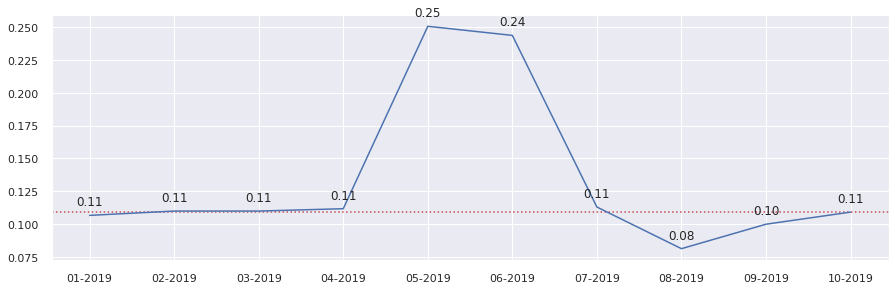

In [114]:
#construção da tabela de forma ordenada
x = ['01-2019', '02-2019', '03-2019', '04-2019', '05-2019', '06-2019', '07-2019', '08-2019', '09-2019', '10-2019']
y = [over_30_jan, over_30_fev, over_30_fev, over_30_abr, over_30_mai, over_30_jun, over_30_jul, over_30_ago, over_30_set, over_30_out]

#ajuste do estilo do gráfico
sns.set_theme(style="darkgrid")

#configuração do tamanho do gráfico
plt.figure(figsize=(15, 4.5))

#construção da linha over_30 mob3 fixa (10% é a visão geral do indicador)
plt.axhline(y=over_30_geral, color='r', linestyle='dotted')

#plotando o lineplot
sns.lineplot(x, y)

#função para exibir os rótulos
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#plotar o gráfico
plt.show()

**2.1: Over 30 mob3 - visão safras**


*   Jan/19 = 10,7%
*   Fev/19 = 11,0%
*   Mar/19 = 10,1%
*   Abr/19 = 11,2%
*   Mai/19 = 25,1%
*   Jun/19 = 24,4%
*   Jul/19 = 11,3%
*   Ago/19 = 8,1%
*   Set/19 = 10,0%
*   Out/19 = 10,9%




**3.1: A percepção do time de cartão não está correta.** <br><br>
**3.1: A percepção de tendência de aumento da inadimplência para as safras do 2º semestre de 2019 se deve ao fato de que em agosto observamos a menor inadimplância histórica. Nos meses seguintes a inadimplência volta a se aproximar da média histórica e isso faz com que exista uma "tendência mascarada" se analisarmos um curto período.**

In [129]:
#cópia do dataset principal
copy_client = client.copy()

#join entre os datasets: invoice e client
data_modelo = pd.merge(invoice_status, copy_client, how='left', on='ClientId')

#construção da variával safra para facilitar a análise
data_modelo['Safra'] = data_modelo['FirstInvoiceDate'].dt.strftime('%m-%Y')

# exibição das primeiras linhas para validação
data_modelo.head()
################################################################################################






#construindo a variável idade
data_modelo['idade'] = data_modelo.RegisterApprovalDate - data_modelo.Birthdate

#convertendo a variável idade para númerico
data_modelo['idade'] = (data_modelo['idade'].dt.days / 365)


# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
fx_idade_1 = data_modelo.loc[(data_modelo['idade'] <= 18)]
fx_idade_1['fx_idade'] = '0-18'

fx_idade_2 = data_modelo.loc[(data_modelo['idade'] > 18) & (data_modelo['idade'] <= 26)]
fx_idade_2['fx_idade'] = '19-26'

fx_idade_3 = data_modelo.loc[(data_modelo['idade'] > 26) & (data_modelo['idade'] <= 34)]
fx_idade_3['fx_idade'] = '27-34'

fx_idade_4 = data_modelo.loc[(data_modelo['idade'] > 34) & (data_modelo['idade'] <= 42)]
fx_idade_4['fx_idade'] = '35-42'

fx_idade_5 = data_modelo.loc[(data_modelo['idade'] > 42) & (data_modelo['idade'] <= 50)]
fx_idade_5['fx_idade'] = '43-50'

fx_idade_6 = data_modelo.loc[(data_modelo['idade'] > 50) & (data_modelo['idade'] <= 58)]
fx_idade_6['fx_idade'] = '51-58'

fx_idade_7 = data_modelo.loc[(data_modelo['idade'] > 58)]
fx_idade_7['fx_idade'] = 'maior que 58'

data_modelo = pd.concat([fx_idade_1, fx_idade_2, fx_idade_3, fx_idade_4, fx_idade_5, fx_idade_6, fx_idade_7])







#construção da flag idade
# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
cond_model_1 = [
    (data_modelo['fx_idade'] == '0-18'),
    (data_modelo['fx_idade'] == '19-26'),
    (data_modelo['fx_idade'] == '27-34'),
    (data_modelo['fx_idade'] == '35-42'),
    (data_modelo['fx_idade'] == '43-50'),
    (data_modelo['fx_idade'] == '51-58'),
    (data_modelo['fx_idade'] == 'maior que 58')]

#valores ordenados que serão substítuidos
values = [1, 2, 3, 4, 5, 6, 7]

#aplicar a função pra susbtituir "fx_idade" em "fx_idade_flg"
data_modelo['fx_idade_flg'] = np.select(cond_model_1, values)







#construção da flg Platform
cond_model_2 = [
    (data_modelo['OSVersion'] == '10.3.3'),
    (data_modelo['OSVersion'] == '7.0'),
    (data_modelo['OSVersion'] == '11.3.1'),
    (data_modelo['OSVersion'] == '6.0.1'),
    (data_modelo['OSVersion'] == '12.2'),
    (data_modelo['OSVersion'] == '11.4'),
    (data_modelo['OSVersion'] == ''),
    (data_modelo['OSVersion'] == '7.1.1'),
    (data_modelo['OSVersion'] == '8.1.0'),
    (data_modelo['OSVersion'] == '8.0.0'),
    (data_modelo['OSVersion'] == '12.1'),
    (data_modelo['OSVersion'] == '13.1.3'),
    (data_modelo['OSVersion'] == '12.4'),
    (data_modelo['OSVersion'] == '5.1.1'),
    (data_modelo['OSVersion'] == '13.1.2'),
    (data_modelo['OSVersion'] == '12.4.1'),
    (data_modelo['OSVersion'] == '11.1.2'),
    (data_modelo['OSVersion'] == '12.4.2'),
    (data_modelo['OSVersion'] == '6.0'),
    (data_modelo['OSVersion'] == '12.1.4'),
    (data_modelo['OSVersion'] == '10.2.1'),
    (data_modelo['OSVersion'] == '5.0.2'),
    (data_modelo['OSVersion'] == '13.3'),
    (data_modelo['OSVersion'] == '7.1.2'),
    (data_modelo['OSVersion'] == '13.0'),
    (data_modelo['OSVersion'] == '10.0'),
    (data_modelo['OSVersion'] == '12.3.1'),
    (data_modelo['OSVersion'] == '5.1'),
    (data_modelo['OSVersion'] == '12.1.2'),
    (data_modelo['OSVersion'] == '12.4.3'),
    (data_modelo['OSVersion'] == '11.4.1'),
    (data_modelo['OSVersion'] == '11.2.6'),
    (data_modelo['OSVersion'] == '4.4.2'),
    (data_modelo['OSVersion'] == '11.0'),
    (data_modelo['OSVersion'] == '10.1.1'),
    (data_modelo['OSVersion'] == '13.2.3'),
    (data_modelo['OSVersion'] == '11.0.3'),
    (data_modelo['OSVersion'] == '12.1.1'),
    (data_modelo['OSVersion'] == '9.3.5'),
    (data_modelo['OSVersion'] == '10.3.1'),
    (data_modelo['OSVersion'] == '12.3.2'),
    (data_modelo['OSVersion'] == '5.0.1'),
    (data_modelo['OSVersion'] == '1.0.7.2'),
    (data_modelo['OSVersion'] == '13.2'),
    (data_modelo['OSVersion'] == '4.4.4'),
    (data_modelo['OSVersion'] == '5.0'),
    (data_modelo['OSVersion'] == '11.2.5'),
    (data_modelo['OSVersion'] == '12.0.1'),
    (data_modelo['OSVersion'] == '12.0'),
    (data_modelo['OSVersion'] == '4.2.2'),
    (data_modelo['OSVersion'] == '11.3'),
    (data_modelo['OSVersion'] == '10.3.2'),
    (data_modelo['OSVersion'] == '10.0.2'),
    (data_modelo['OSVersion'] == '11.2.1'),
    (data_modelo['OSVersion'] == '12.3'),
    (data_modelo['OSVersion'] == '9.3.2'),
    (data_modelo['OSVersion'] == '4.3'),
    (data_modelo['OSVersion'] == '12.1.3'),
    (data_modelo['OSVersion'] == '11.1'),
    (data_modelo['OSVersion'] == '4.1.2'),
    (data_modelo['OSVersion'] == '12.4.4'),
    (data_modelo['OSVersion'] == '9.3.6'),
    (data_modelo['OSVersion'] == '10.3.4'),
    (data_modelo['OSVersion'] == '10.2'),
    (data_modelo['OSVersion'] == '11.1.1'),
    (data_modelo['OSVersion'] == '1.0.8.2'),
    (data_modelo['OSVersion'] == '13.2.2'),
    (data_modelo['OSVersion'] == '11.0.1'),
    (data_modelo['OSVersion'] == '11.2.2'),
    (data_modelo['OSVersion'] == '10.1'),
    (data_modelo['OSVersion'] == '1.0.8.1'),
    (data_modelo['OSVersion'] == '11.0.2'),
    (data_modelo['OSVersion'] == '13.1.1'),
    (data_modelo['OSVersion'] == '10.0.1'),
    (data_modelo['OSVersion'] == '13.1'),
    (data_modelo['OSVersion'] == '9.2.1'),
    (data_modelo['OSVersion'] == '9.3.4'),
    (data_modelo['OSVersion'] == '4.4.3'),
    (data_modelo['OSVersion'] == '1.0.8'),
    (data_modelo['OSVersion'] == '11.2'),
    (data_modelo['OSVersion'] == '9.3'),
    (data_modelo['OSVersion'] == '9.0'),
    (data_modelo['OSVersion'] == '9.3.3'),
    (data_modelo['OSVersion'] == '10.3'),
    (data_modelo['OSVersion'] == '9.2'),
    (data_modelo['OSVersion'] == '9.3.1'),
    (data_modelo['OSVersion'] == '7.1'),
    (data_modelo['OSVersion'] == '10'),
    (data_modelo['OSVersion'] == '8.1.0+++xXx_NoLimits_3.3'),
    (data_modelo['OSVersion'] == '6.1'),
    (data_modelo['OSVersion'] == '8.1'),
    (data_modelo['OSVersion'] == '8.0')]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]

data_modelo['OSVersion_flg'] = np.select(cond_model_2, values)








data_modelo['AddressState'].unique()
#construção da flg Estado

cond_model_3 = [
    (data_modelo['AddressState'] == 'SP'),
    (data_modelo['AddressState'] == 'AM'),
    (data_modelo['AddressState'] == 'GO'),
    (data_modelo['AddressState'] == 'MG'),
    (data_modelo['AddressState'] == 'ES'),
    (data_modelo['AddressState'] == 'CE'),
    (data_modelo['AddressState'] == 'DF'),
    (data_modelo['AddressState'] == 'MT'),
    (data_modelo['AddressState'] == 'PR'),
    (data_modelo['AddressState'] == 'BA'),
    (data_modelo['AddressState'] == 'AL'),
    (data_modelo['AddressState'] == 'PE'),
    (data_modelo['AddressState'] == 'RN'),
    (data_modelo['AddressState'] == 'RJ'),
    (data_modelo['AddressState'] == 'PB'),
    (data_modelo['AddressState'] == 'RS'),
    (data_modelo['AddressState'] == 'RO'),
    (data_modelo['AddressState'] == 'PA'),
    (data_modelo['AddressState'] == 'SC'),
    (data_modelo['AddressState'] == 'PI'),
    (data_modelo['AddressState'] == 'MS'),
    (data_modelo['AddressState'] == 'SE'),
    (data_modelo['AddressState'] == 'MA'),
    (data_modelo['AddressState'] == 'TO'),
    (data_modelo['AddressState'] == 'RR'),
    (data_modelo['AddressState'] == 'Piauí'),
    (data_modelo['AddressState'] == 'AP'),
    (data_modelo['AddressState'] == 'AC'),
    (data_modelo['AddressState'] == 'Bahia'),
    (data_modelo['AddressState'] == ''),
    (data_modelo['AddressState'] == 'Sc'),
    (data_modelo['AddressState'] == 'Ceará'),
    (data_modelo['AddressState'] == 'bahia'),
    (data_modelo['AddressState'] == 'Pe'),
    (data_modelo['AddressState'] == 'pr'),
    (data_modelo['AddressState'] == 'Se')]


values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 20, 27, 28, 10, 30, 19, 6, 10, 12, 9, 22]
data_modelo['AddressState_flg'] = np.select(cond_model_3, values)

data_modelo[['AddressState', 'AddressState_flg']].loc[(data_modelo['AddressState'] == 'nan')]








conditions_4 = [
    (data_modelo['Platform'] == 'iPhone+OS'),
    (data_modelo['Platform'] == 'Android'),
    (data_modelo['Platform'] == '')]

#valores ordenados que serão substítuidos
values = [1, 2, 3]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
data_modelo['Platform_flg'] = np.select(conditions_4, values)







conditions_5 = [
    (data_modelo['Gender'] == 'Male'),
    (data_modelo['Gender'] == 'Female'),
    (data_modelo['Gender'] == 'Unknown')]

#valores ordenados que serão substítuidos
values = [1, 2, 3]

#aplicar a função pra susbtituir "Ativo" em "Aprovado"
data_modelo['Gender_flg'] = np.select(conditions_5, values)










# agrupar a categoria "Ativo" dentro de "Aprovado" para facilitar o cálculo
cond_model_5 = [
    (data_modelo['InvoiceStatus'] == 'REGULAR'),
    (data_modelo['InvoiceStatus'] == 'INADIMPLENTE')]

values = [0, 1]
data_modelo['InvoiceStatus_flg'] = np.select(cond_model_5, values)

**Estudo das variáveis que podem impactar a indadimplência**

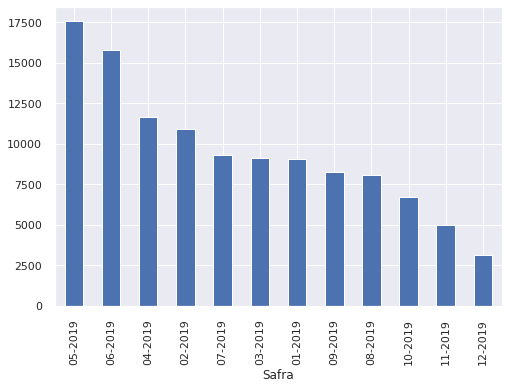

In [116]:
data_modelo.groupby('Safra')['ClientId'].count().sort_values(ascending=False).plot(kind='bar')

In [117]:
renda_maio = data_modelo.loc[(invoice_status['FirstInvoiceDate'] >= '2019-05-01') & (data_modelo['FirstInvoiceDate'] <= '2019-05-31') 
                            & (data_modelo['InvoiceDueDate'] >= '2019-08-01') & (data_modelo['InvoiceDueDate'] <= '2019-08-31') & (data_modelo['InvoiceValue'] != 0)]

renda_maio = renda_maio[['Safra', 'PresumedIncome', 'OSVersion_flg', 'AddressState_flg']]
renda_maio.describe()

,PresumedIncome,OSVersion_flg,AddressState_flg
count,2022.000000,2022.000000,2022.000000
mean,1574.026009,11.176558,8.327399
std,1830.838461,12.671466,6.356756
min,0.000000,0.000000,1.000000
25%,978.200000,2.000000,3.000000
50%,1187.845000,9.000000,7.000000
75%,1551.957500,14.000000,14.000000
max,41884.090000,84.000000,28.000000


In [118]:
renda_jun = data_modelo.loc[(invoice_status['FirstInvoiceDate'] >= '2019-06-01') & (data_modelo['FirstInvoiceDate'] <= '2019-06-30') 
                            & (data_modelo['InvoiceDueDate'] >= '2019-09-01') & (data_modelo['InvoiceDueDate'] <= '2019-09-30') & (data_modelo['InvoiceValue'] != 0)]

renda_jun = renda_jun[['Safra', 'PresumedIncome']]
renda_jun.describe()

,PresumedIncome
count,1977.000000
mean,1656.247699
std,1956.733030
min,0.000000
25%,991.780000
50%,1219.810000
75%,1625.990000
max,35878.330000


In [119]:
rend_ago = data_modelo.loc[(data_modelo['FirstInvoiceDate'] >= '2019-08-01') & (data_modelo['FirstInvoiceDate'] <= '2019-08-31') 
                            & (data_modelo['InvoiceDueDate'] >= '2019-11-01') & (data_modelo['InvoiceDueDate'] <= '2019-11-30') & (data_modelo['InvoiceValue'] != 0)]

rend_ago = rend_ago[['Safra', 'PresumedIncome']]
rend_ago.describe()

,PresumedIncome
count,1344.000000
mean,1745.564963
std,1416.858829
min,0.000000
25%,1068.320000
50%,1314.370000
75%,1959.987500
max,24024.370000


**Dataset preparado para modelo de Regressão Logística**

In [131]:
data_modelo_v2 = data_modelo.loc[:, ['InvoiceStatus_flg', 'InvoiceValue', 'PresumedIncome', 'Platform_flg', 'AddressState_flg', 'fx_idade_flg', 'OSVersion_flg', 'Gender_flg']]
data_modelo_v2.head(3)

,InvoiceStatus_flg,InvoiceValue,PresumedIncome,Platform_flg,AddressState_flg,fx_idade_flg,OSVersion_flg,Gender_flg
6473,0,27.75,760.6,1,1,1,1,2
37283,1,569.96,760.6,1,1,1,1,2
105705,1,503.33,760.6,1,1,1,1,2


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_modelo_v2.iloc[:, [1, 2, 3, 4, 5, 6, 7]].values
y = data_modelo_v2.iloc[:, [0]].values

In [164]:
model = LogisticRegression()
model.fit(X, y)

model.score(X, y)

0.902801176686249

**Avaliação do Modelo -  Matriz de Confusão**

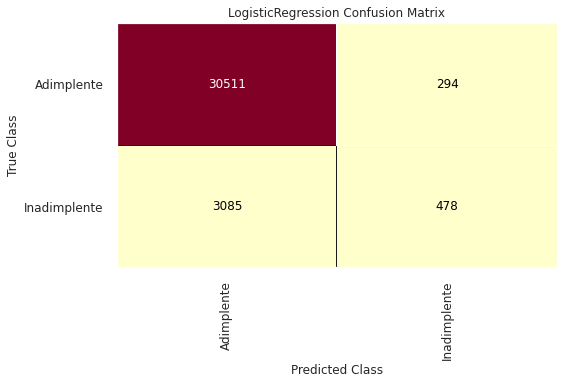

<Figure size 576x396 with 0 Axes>

In [176]:
confusion_matrix(
    model,
    X_train, y_train, X_test, y_test,
    classes=['Adimplente', 'Inadimplente'])

plt.tight_layout()

**Importância das variáveis para explicar a inadimplência**

In [191]:
import math

w0, w1, w2, w3, w4, w5, w6 = model.coef_[0]
w = [w0, w1, w2, w3, w4, w5, w6]

names = ['InvoiceValue', 'PresumedIncome', 'Platform_flg', 'AddressState_flg', 'fx_idade_flg', 'OSVersion_flg', 'Gender_flg']
df_importance = pd.DataFrame(names, columns=['variavel'])
df_importance['importancia'] = pow(math.e, np.array(w))

df_importance.sort_values(ascending=False, by='importancia')

,variavel,importancia
3,AddressState_flg,1.003534
0,InvoiceValue,1.002900
1,PresumedIncome,0.998325
5,OSVersion_flg,0.984068
4,fx_idade_flg,0.901200
6,Gender_flg,0.789643
2,Platform_flg,0.778996
